In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib import font_manager, rc 
font_list=font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
font_name = font_manager.FontProperties(fname=font_list[47])
font_name.get_name()

rc('font', family='Century Gothic')


GS리테일의 카테고리 40번 매출 예측
-------------------------------------------------------------------------------
> 1. machine learning의 regressors 사용
> 2. 제일 좋은 성능인 randomforest를 이용한 예측값과 기존 라벨값을 비교

In [78]:
sns_all = pd.read_csv('./df_all.csv')

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
data_train, data_test = train_test_split(sns_all, test_size=0.3, random_state=50)

In [81]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1738 entries, 864 to 1712
Data columns (total 16 columns):
Datetime     1738 non-null object
serial       1738 non-null int64
LCLS_10_P    1738 non-null float64
LCLS_20_P    1738 non-null float64
LCLS_30_P    1738 non-null float64
LCLS_40_P    1738 non-null float64
LCLS_50_P    1738 non-null float64
LCLS_60_P    1738 non-null float64
LCLS_70_P    1738 non-null float64
LCLS_80_P    1738 non-null float64
YEAR         1738 non-null int64
MONTH        1738 non-null int64
DAY          1738 non-null int64
Count        1738 non-null int64
pm           1738 non-null float64
Pop          1738 non-null float64
dtypes: float64(10), int64(5), object(1)
memory usage: 230.8+ KB


In [82]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745 entries, 1632 to 450
Data columns (total 16 columns):
Datetime     745 non-null object
serial       745 non-null int64
LCLS_10_P    745 non-null float64
LCLS_20_P    745 non-null float64
LCLS_30_P    745 non-null float64
LCLS_40_P    745 non-null float64
LCLS_50_P    745 non-null float64
LCLS_60_P    745 non-null float64
LCLS_70_P    745 non-null float64
LCLS_80_P    745 non-null float64
YEAR         745 non-null int64
MONTH        745 non-null int64
DAY          745 non-null int64
Count        745 non-null int64
pm           745 non-null float64
Pop          745 non-null float64
dtypes: float64(10), int64(5), object(1)
memory usage: 98.9+ KB


In [83]:
data_train.shape

(1738, 16)

In [84]:
data_test.shape

(745, 16)

In [85]:
#Copy for emergency:
TRAIN_RESERVE = data_train.copy()

In [86]:
#Data Preprocessing for Training Set

data_train

,Datetime,serial,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P,YEAR,MONTH,DAY,Count,pm,Pop
864,2018-08-02,11110670,31.8,16.6,46.9,0.5,3.8,0.100000,0.100000,0.300000,2018,8,2,2366,-10.311674,11.282707
1803,2018-12-16,11110630,27.9,20.0,40.0,3.2,6.4,0.000000,2.300000,0.200000,2018,12,16,3280,2.701935,11.504056
1083,2018-09-05,11110560,39.2,19.9,31.9,4.8,3.8,0.685234,0.400000,0.100000,2018,9,5,2928,-10.795550,11.938023
2337,2019-03-10,11110670,31.2,20.1,40.3,1.4,4.7,0.200000,1.900000,0.200000,2019,3,10,3726,46.327395,10.842772
1375,2018-10-17,11110560,45.5,20.4,26.1,4.2,2.8,0.300000,0.500000,0.100000,2018,10,17,5612,22.500313,11.924664
1407,2018-10-21,11110640,22.8,18.8,43.7,3.3,8.8,0.400000,1.700000,0.500000,2018,10,21,2769,7.792094,10.753446
344,2018-05-19,11110670,29.2,20.3,39.2,0.9,7.7,0.600000,1.600000,0.400000,2018,5,19,3091,-44.672724,11.141151
1942,2019-01-05,11110690,25.2,23.6,43.3,0.6,6.4,0.685234,0.700000,0.100000,2019,1,5,4206,54.340667,9.257129
404,2018-05-28,11110650,35.1,18.3,35.4,3.0,5.7,0.400000,2.000000,0.100000,2018,5,28,5061,8.278848,11.650180
2140,2019-02-04,11110650,33.2,20.8,30.4,4.2,8.0,1.500000,1.900000,0.100000,2019,2,4,4968,38.823688,10.731450


In [87]:
data_train.set_index('Datetime', True)

,serial,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P,YEAR,MONTH,DAY,Count,pm,Pop
Datetime,,,,,,,,,,,,,,,
2018-08-02,11110670,31.8,16.6,46.9,0.5,3.8,0.100000,0.100000,0.300000,2018,8,2,2366,-10.311674,11.282707
2018-12-16,11110630,27.9,20.0,40.0,3.2,6.4,0.000000,2.300000,0.200000,2018,12,16,3280,2.701935,11.504056
2018-09-05,11110560,39.2,19.9,31.9,4.8,3.8,0.685234,0.400000,0.100000,2018,9,5,2928,-10.795550,11.938023
2019-03-10,11110670,31.2,20.1,40.3,1.4,4.7,0.200000,1.900000,0.200000,2019,3,10,3726,46.327395,10.842772
2018-10-17,11110560,45.5,20.4,26.1,4.2,2.8,0.300000,0.500000,0.100000,2018,10,17,5612,22.500313,11.924664
2018-10-21,11110640,22.8,18.8,43.7,3.3,8.8,0.400000,1.700000,0.500000,2018,10,21,2769,7.792094,10.753446
2018-05-19,11110670,29.2,20.3,39.2,0.9,7.7,0.600000,1.600000,0.400000,2018,5,19,3091,-44.672724,11.141151
2019-01-05,11110690,25.2,23.6,43.3,0.6,6.4,0.685234,0.700000,0.100000,2019,1,5,4206,54.340667,9.257129
2018-05-28,11110650,35.1,18.3,35.4,3.0,5.7,0.400000,2.000000,0.100000,2018,5,28,5061,8.278848,11.650180


In [88]:
gs_related = [#'LCLS_40_P',
              'LCLS_80_P','LCLS_20_P','LCLS_10_P','LCLS_30_P','LCLS_50_P','LCLS_60_P','LCLS_70_P']

#flow = ['Pop']

In [89]:
data_labels = data_train['LCLS_40_P']

In [90]:
data_labels.head()

864     0.5
1803    3.2
1083    4.8
2337    1.4
1375    4.2
Name: LCLS_40_P, dtype: float64

In [91]:
data = data_train.drop(gs_related, axis = 1)

data = data.drop(['LCLS_40_P'], axis = 1)

In [92]:
data.head()

,Datetime,serial,YEAR,MONTH,DAY,Count,pm,Pop
864,2018-08-02,11110670,2018,8,2,2366,-10.311674,11.282707
1803,2018-12-16,11110630,2018,12,16,3280,2.701935,11.504056
1083,2018-09-05,11110560,2018,9,5,2928,-10.795550,11.938023
2337,2019-03-10,11110670,2019,3,10,3726,46.327395,10.842772
1375,2018-10-17,11110560,2018,10,17,5612,22.500313,11.924664


In [94]:
cat_attributes = ['YEAR',"MONTH","DAY",'serial']

num_attributes = list(data.columns)
num_attributes.remove('Datetime')
num_attributes.remove('YEAR')
num_attributes.remove("MONTH")
num_attributes.remove("DAY")
num_attributes.remove('serial')


In [95]:
num_attributes

['Count', 'pm', 'Pop']

In [96]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [97]:
transform_pipeline = ColumnTransformer([
        ("cat", OneHotEncoder(), cat_attributes),
        ("num", StandardScaler(), num_attributes),
    ])

In [98]:
data_prepared = transform_pipeline.fit_transform(data)

/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return 

In [99]:
data_prepared

<1738x57 sparse matrix of type '<class 'numpy.float64'>'
	with 12166 stored elements in Compressed Sparse Row format>

In [100]:
data_labels

864     0.5
1803    3.2
1083    4.8
2337    1.4
1375    4.2
1407    3.3
344     0.9
1942    0.6
404     3.0
2140    4.2
1859    4.4
2062    3.0
1724    1.7
1070    5.1
1891    4.5
527     0.3
570     0.6
468     3.4
1373    0.1
1268    2.4
957     6.4
1815    0.4
959     2.4
1071    1.0
382     1.3
2326    5.2
1348    2.6
2101    1.8
2343    4.1
735     0.2
       ... 
835     3.8
992     4.0
371     1.7
2074    3.0
1523    2.8
1443    2.4
414     2.1
79      3.9
518     3.0
507     5.1
1022    3.3
2368    4.9
2389    3.5
1585    2.7
218     1.3
2202    2.9
603     2.9
1476    2.5
367     1.2
2119    3.1
2143    2.2
70      2.5
2277    5.9
2118    3.3
132     5.4
2014    3.8
2157    4.7
1931    4.8
1504    1.5
1712    4.2
Name: LCLS_40_P, Length: 1738, dtype: float64

In [101]:
data_prepared.shape

(1738, 57)

In [102]:
data.shape

(1738, 8)

In [103]:
#The shape of prepared data and actual data is different because we added columns while doing One Hot Encoding

#Sample row:
print(data_prepared[0], sep='\n')

  (0, 0)	1.0
  (0, 9)	1.0
  (0, 15)	1.0
  (0, 51)	1.0
  (0, 54)	-1.1527340655338474
  (0, 55)	-0.3813229527599299
  (0, 56)	-0.3553171350954068


In [104]:
#Training
data = data_prepared.copy()

In [105]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [106]:
def evaluation(true_labels, predictions):
    mse = mean_squared_error(true_labels, predictions)
    r2 = r2_score(true_labels, predictions)
    rmse = np.sqrt(mse)
    return mse, r2, rmse

In [107]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(data, data_labels)
lin_reg_predictions = lin_reg.predict(data)

mse, r2, rmse = evaluation(data_labels, lin_reg_predictions)

In [108]:
print('********LINEAR REGRESSION********\n','MSE: ', mse,'\nR2 score: ', r2, '\nRMSE: ',rmse)

********LINEAR REGRESSION********
 MSE:  1.2561287175309508 
R2 score:  0.4789082403498678 
RMSE:  1.120771483189571


In [109]:
from sklearn.linear_model import ElasticNet
elanet = ElasticNet()
elanet.fit(data, data_labels)
elanet_predictions = elanet.predict(data)

mse, r2, rmse = evaluation(data_labels, elanet_predictions)

In [110]:
print('********ElasticNet********\n','MSE: ', mse,'\nR2 score: ', r2, '\nRMSE: ',rmse)

********ElasticNet********
 MSE:  2.4105710640566107 
R2 score:  0.0 
RMSE:  1.5526013860797017


In [112]:
#Decision Tree regressor

In [113]:
from sklearn.tree import DecisionTreeRegressor

In [114]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(data, data_labels)
tree_reg_predictions = tree_reg.predict(data)

In [115]:
mse, r2, rmse = evaluation(data_labels, tree_reg_predictions)
print('********DECISION TREE********\n','MSE: ', mse,'\nR2 score: ', r2, '\nRMSE: ',rmse)

********DECISION TREE********
 MSE:  7.090923886153004e-34 
R2 score:  1.0 
RMSE:  2.6628788718514786e-17


In [117]:
#Random Forest regressor
from sklearn.ensemble import RandomForestRegressor

In [118]:
import time
start = time.time()    
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(data, data_labels)
end = time.time()
print('Time to train WITH DEFAULT PARAMETERS: ',end - start, ' seconds')

/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Time to train WITH DEFAULT PARAMETERS:  0.22835421562194824  seconds


In [119]:
rf_predictions = random_forest_reg.predict(data) 

In [120]:
mse, r2, rmse = evaluation(data_labels, rf_predictions)
print('********RANDOM FOREST********\n','MSE: ', mse,'\nR2 score: ', r2, '\nRMSE: ',rmse)

********RANDOM FOREST********
 MSE:  0.2683931844054215 
R2 score:  0.8886599161471066 
RMSE:  0.518066776010025


In [121]:
#size of our training and test sets:

data_train.shape

(1738, 16)

In [122]:
data_test.shape

(745, 16)

In [123]:
#Evaluate on TEST Set
data_test_copy = data_test.copy()
data_test_labels = data_test['LCLS_40_P']

In [124]:
data_test = data_test.drop(['LCLS_40_P'], axis = 1)
data_test = data_test.drop(gs_related, axis = 1)
data_test.set_index('Datetime', True)

,serial,YEAR,MONTH,DAY,Count,pm,Pop
Datetime,,,,,,,
2018-11-22,11110515,2018,11,22,4303,-28.891690,10.517483
2018-06-30,11110560,2018,6,30,2469,6.540825,11.944214
2018-06-19,11110630,2018,6,19,2431,-7.845823,12.191710
2018-09-06,11110615,2018,9,6,3033,-16.027910,13.444329
2018-07-03,11110650,2018,7,3,3492,-28.370132,11.589025
2019-03-22,11110560,2019,3,22,5017,-24.292948,11.863230
2018-06-26,11110515,2018,6,26,4433,9.053276,10.797737
2018-10-09,11110670,2018,10,9,2612,-22.790967,11.020398
2018-04-24,11110650,2018,4,24,5821,-42.998181,11.732856


In [125]:
data_test_prepared = transform_pipeline.fit_transform(data_test)

/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return 

In [126]:
data_test.shape

(745, 8)

In [127]:
data_test.head()

,Datetime,serial,YEAR,MONTH,DAY,Count,pm,Pop
1632,2018-11-22,11110515,2018,11,22,4303,-28.891690,10.517483
634,2018-06-30,11110560,2018,6,30,2469,6.540825,11.944214
560,2018-06-19,11110630,2018,6,19,2431,-7.845823,12.191710
1090,2018-09-06,11110615,2018,9,6,3033,-16.027910,13.444329
655,2018-07-03,11110650,2018,7,3,3492,-28.370132,11.589025


In [128]:
#prediction with linear regression model
lin_reg_predictions = lin_reg.predict(data_test_prepared)
mse, r2, rmse = evaluation(data_test_labels, lin_reg_predictions)

print('Test Set Check','MSE: ', mse,'\nR2 score: ', r2, '\nRMSE: ',rmse)

Test Set Check MSE:  1.311928630685883 
R2 score:  0.41821884076066596 
RMSE:  1.1453945305814426


In [129]:
#prediction with Decision Tree model
dt_predictions = tree_reg.predict(data_test_prepared)
mse, r2, rmse = evaluation(data_test_labels, dt_predictions)

print('Test Set Check','MSE: ', mse,'\nR2 score: ', r2, '\nRMSE: ',rmse)

Test Set Check MSE:  2.1171087042589205 
R2 score:  0.06115780432697515 
RMSE:  1.4550287640658244


In [130]:
#prediction with Random Forest regressor model
rf_predictions = random_forest_reg.predict(data_test_prepared)
mse, r2, rmse = evaluation(data_test_labels, rf_predictions)

print('Test Set Check','MSE: ', mse,'\nR2 score: ', r2, '\nRMSE: ',rmse)

Test Set Check MSE:  1.3574239172009324 
R2 score:  0.3980437337391709 
RMSE:  1.1650853690613974


In [135]:
from sklearn.linear_model import ElasticNet
en_predictions = elanet.predict(data_test_prepared)
mse, r2, rmse = evaluation(data_test_labels, en_predictions)
print('TEST SET CHECK', '\nMSE: ', mse,'\nR2 score: ', r2, '\nRMSE: ',rmse)

TEST SET CHECK 
MSE:  2.2556608286193893 
R2 score:  -0.00028381196229210204 
RMSE:  1.5018857575126643


In [137]:
start = time.time()
random_forest_reg_tuned = RandomForestRegressor(max_depth=1000, n_estimators=700, max_features=1,
                                               random_state=100)
random_forest_reg_tuned.fit(data, data_labels)
end = time.time()
print('Time to train WITH TUNED PARAMETERS: ',end - start, ' seconds')
rf_predictions_tuned = random_forest_reg_tuned.predict(data)

Time to train WITH TUNED PARAMETERS:  3.049140691757202  seconds


In [138]:
rf_predictions_tuned = random_forest_reg_tuned.predict(data_test_prepared)
mse, r2, rmse = evaluation(data_test_labels, rf_predictions_tuned)
print('TEST SET CHECK', '\nMSE: ', mse,'\nR2 score: ', r2, '\nRMSE: ',rmse)

TEST SET CHECK 
MSE:  1.3583497420136554 
R2 score:  0.39763317220388605 
RMSE:  1.1654826219269232


In [139]:
print('Predictions: ','\tGround Truth Labels')
for i in range(len(rf_predictions_tuned[:10])):
    print(int(rf_predictions_tuned[i]), '\t\t', int(data_test_labels.iloc[i]), '\n')

Predictions:  	Ground Truth Labels
2 		 2 

3 		 4 

3 		 1 

2 		 2 

3 		 4 

3 		 1 

2 		 1 

1 		 0 

2 		 3 

3 		 4 



/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Century Gothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


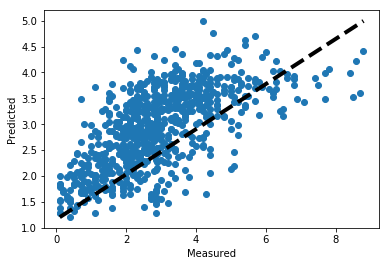

In [140]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.scatter(data_test_labels, rf_predictions_tuned)
ax.plot([data_test_labels.min(), data_test_labels.max()], [rf_predictions_tuned.min(), rf_predictions_tuned.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Century Gothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


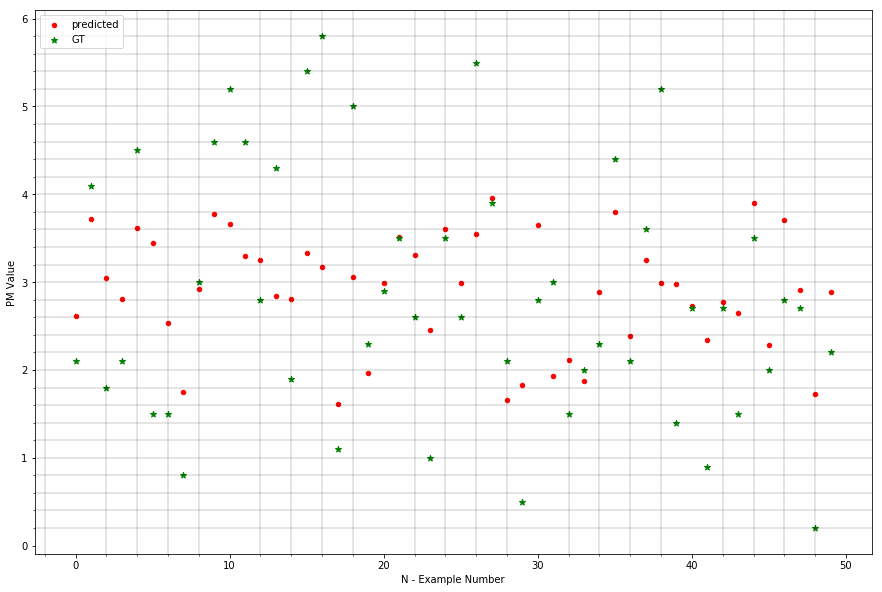

In [141]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(111)

ax1.scatter(range(len(rf_predictions_tuned[:50])), rf_predictions_tuned[:50], s=20, c='r', marker="o", label='predicted')
ax1.scatter(range(len(data_test_labels[:50])),data_test_labels[:50], s=40, c='g', marker="*", label='GT')
plt.minorticks_on()
plt.grid(which='minor', linestyle='-', linewidth='0.2', color='black')
plt.legend(loc='upper left')
plt.ylabel('PM Value')
plt.xlabel('N - Example Number')
plt.show()

In [142]:
data_test_copy['predict']= lin_reg_predictions

In [143]:
data_test_copy

,Datetime,serial,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P,YEAR,MONTH,DAY,Count,pm,Pop,predict
1632,2018-11-22,11110515,35.9,21.9,34.5,2.1,5.0,0.200000,0.000000,0.400000,2018,11,22,4303,-28.891690,10.517483,2.274576
634,2018-06-30,11110560,31.1,24.1,32.4,4.1,7.3,0.600000,0.100000,0.200000,2018,6,30,2469,6.540825,11.944214,3.934556
560,2018-06-19,11110630,28.5,16.8,45.8,1.8,4.8,1.200000,1.200000,0.000000,2018,6,19,2431,-7.845823,12.191710,2.762999
1090,2018-09-06,11110615,28.9,16.2,43.3,2.1,7.9,0.400000,1.100000,0.100000,2018,9,6,3033,-16.027910,13.444329,2.220812
655,2018-07-03,11110650,31.8,15.7,39.6,4.5,6.3,0.300000,1.400000,0.400000,2018,7,3,3492,-28.370132,11.589025,3.968711
2408,2019-03-22,11110560,39.0,24.4,29.8,1.5,4.3,0.100000,0.700000,0.200000,2019,3,22,5017,-24.292948,11.863230,3.613953
607,2018-06-26,11110515,35.4,23.6,31.7,1.5,7.6,0.100000,1.027309,0.100000,2018,6,26,4433,9.053276,10.797737,2.429383
1321,2018-10-09,11110670,40.5,17.2,37.6,0.8,3.3,0.685234,0.500000,0.384605,2018,10,9,2612,-22.790967,11.020398,1.126579
168,2018-04-24,11110650,37.1,20.6,32.4,3.0,4.5,0.600000,1.600000,0.200000,2018,4,24,5821,-42.998181,11.732856,3.368739
2462,2019-03-29,11110560,33.8,20.2,33.6,4.6,6.6,0.685234,1.200000,0.100000,2019,3,29,6678,-34.435869,11.886576,4.101398


In [144]:
data_test_copy.isnull().sum()

Datetime     0
serial       0
LCLS_10_P    0
LCLS_20_P    0
LCLS_30_P    0
LCLS_40_P    0
LCLS_50_P    0
LCLS_60_P    0
LCLS_70_P    0
LCLS_80_P    0
YEAR         0
MONTH        0
DAY          0
Count        0
pm           0
Pop          0
predict      0
dtype: int64

In [145]:
type(data_test_copy['Datetime'])

pandas.core.series.Series

In [146]:
data_test_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745 entries, 1632 to 450
Data columns (total 17 columns):
Datetime     745 non-null object
serial       745 non-null int64
LCLS_10_P    745 non-null float64
LCLS_20_P    745 non-null float64
LCLS_30_P    745 non-null float64
LCLS_40_P    745 non-null float64
LCLS_50_P    745 non-null float64
LCLS_60_P    745 non-null float64
LCLS_70_P    745 non-null float64
LCLS_80_P    745 non-null float64
YEAR         745 non-null int64
MONTH        745 non-null int64
DAY          745 non-null int64
Count        745 non-null int64
pm           745 non-null float64
Pop          745 non-null float64
predict      745 non-null float64
dtypes: float64(11), int64(5), object(1)
memory usage: 104.8+ KB


In [147]:
# data_test_copy.reset_index(inplace=False)
# data_test_copy=data_test_copy.sort_values('Datetime')
# data_test_copy['Datetime']= pd.to_datetime(data_test_copy['Datetime'], format='%Y-%m-%d')
# date_idx= pd.DatetimeIndex(data_test_copy['Datetime'])

data_test_copy['Datetime']=pd.to_datetime(data_test_copy['Datetime'], format='%Y-%m-%d')
data_test_copy.set_index(['Datetime'], inplace=True)

In [148]:
data_test_copy

,serial,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P,YEAR,MONTH,DAY,Count,pm,Pop,predict
Datetime,,,,,,,,,,,,,,,,
2018-11-22,11110515,35.9,21.9,34.5,2.1,5.0,0.200000,0.000000,0.400000,2018,11,22,4303,-28.891690,10.517483,2.274576
2018-06-30,11110560,31.1,24.1,32.4,4.1,7.3,0.600000,0.100000,0.200000,2018,6,30,2469,6.540825,11.944214,3.934556
2018-06-19,11110630,28.5,16.8,45.8,1.8,4.8,1.200000,1.200000,0.000000,2018,6,19,2431,-7.845823,12.191710,2.762999
2018-09-06,11110615,28.9,16.2,43.3,2.1,7.9,0.400000,1.100000,0.100000,2018,9,6,3033,-16.027910,13.444329,2.220812
2018-07-03,11110650,31.8,15.7,39.6,4.5,6.3,0.300000,1.400000,0.400000,2018,7,3,3492,-28.370132,11.589025,3.968711
2019-03-22,11110560,39.0,24.4,29.8,1.5,4.3,0.100000,0.700000,0.200000,2019,3,22,5017,-24.292948,11.863230,3.613953
2018-06-26,11110515,35.4,23.6,31.7,1.5,7.6,0.100000,1.027309,0.100000,2018,6,26,4433,9.053276,10.797737,2.429383
2018-10-09,11110670,40.5,17.2,37.6,0.8,3.3,0.685234,0.500000,0.384605,2018,10,9,2612,-22.790967,11.020398,1.126579
2018-04-24,11110650,37.1,20.6,32.4,3.0,4.5,0.600000,1.600000,0.200000,2018,4,24,5821,-42.998181,11.732856,3.368739


In [149]:
data_test_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 745 entries, 2018-11-22 to 2018-06-03
Data columns (total 16 columns):
serial       745 non-null int64
LCLS_10_P    745 non-null float64
LCLS_20_P    745 non-null float64
LCLS_30_P    745 non-null float64
LCLS_40_P    745 non-null float64
LCLS_50_P    745 non-null float64
LCLS_60_P    745 non-null float64
LCLS_70_P    745 non-null float64
LCLS_80_P    745 non-null float64
YEAR         745 non-null int64
MONTH        745 non-null int64
DAY          745 non-null int64
Count        745 non-null int64
pm           745 non-null float64
Pop          745 non-null float64
predict      745 non-null float64
dtypes: float64(11), int64(5)
memory usage: 98.9 KB


In [150]:
data_test_copy = data_test_copy.resample('M').mean().head()

In [151]:
data_test_copy.head()

,serial,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P,YEAR,MONTH,DAY,Count,pm,Pop,predict
Datetime,,,,,,,,,,,,,,,,
2018-04-30,1.111063e+07,30.906944,20.594444,37.430556,2.513360,6.659722,0.549907,1.362249,0.238781,2018.0,4.0,14.027778,5573.416667,-7.841365,11.625099,2.534952
2018-05-31,1.111063e+07,29.259677,20.927419,38.348387,2.561290,7.180645,0.607058,1.084460,0.255707,2018.0,5.0,14.725806,4778.451613,-2.253416,11.599618,2.648913
2018-06-30,1.111061e+07,29.321429,21.075714,39.858571,2.645170,5.210000,0.660748,1.147923,0.266043,2018.0,6.0,14.214286,3946.600000,-9.474633,11.378493,2.732552
2018-07-31,1.111062e+07,28.637705,19.900000,41.368852,2.880719,5.483607,0.542084,1.167661,0.253341,2018.0,7.0,14.655738,3240.918033,-20.670185,11.605323,2.876833
2018-08-31,1.111061e+07,29.275000,18.602273,41.747727,2.718182,5.915909,0.618105,1.084712,0.201923,2018.0,8.0,16.045455,2253.840909,-17.555413,11.648233,2.558222


/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Century Gothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


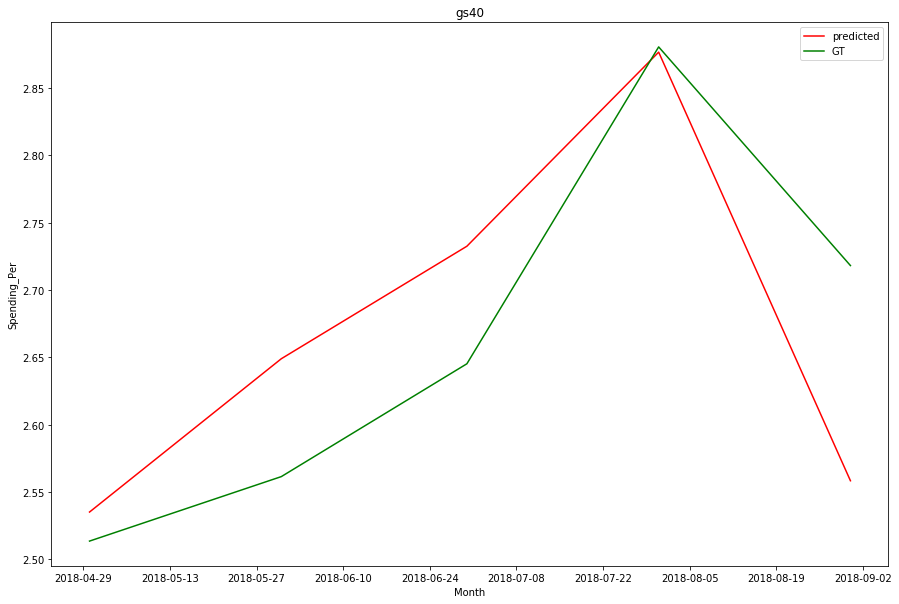

In [152]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(111)

ax1.plot(data_test_copy.index,data_test_copy['predict'], c='r', label='predicted')
ax1.plot(data_test_copy.index,data_test_copy['LCLS_40_P'], c='g', label='GT')
#plt.minorticks_on()
plt.title('gs40')
plt.grid(which='minor', linestyle='-', linewidth='0.2', color='black')
#plt.ylim(25,35)
plt.legend(loc='upper right')
plt.ylabel('Spending_Per')
plt.xlabel('Month')
plt.show()
